In [206]:
# THIS IS DONE ON GOOGLE COLAB TO ACCESS GPU AND OTHER FEATURES

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model # model class api allows to define a model # we'll use it to visualize output from aor 2 conv layers

from keras.layers import Dropout # avoid overfitting # ignores few nodes with bad performance
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D # conv layers
from keras.layers.convolutional import MaxPooling2D # pool layers
import random

In [207]:
np.random.seed(0)

In [208]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [209]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [210]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

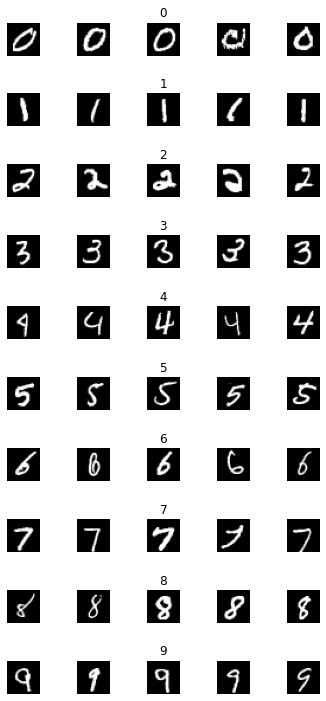

In [211]:
num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


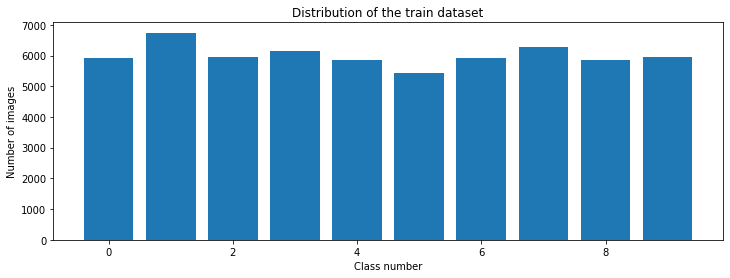

In [212]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()


In [213]:
X_train = X_train.reshape(60000, 28, 28, 1) # no need of flattening in cnn ..... and depth=1 should be specified
X_test = X_test.reshape(10000, 28, 28, 1)

In [214]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [215]:
X_train = X_train/255
X_test = X_test/255

In [216]:
# defining leNet_model function
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu')) # 30 filters are enough , 5X5 filter
  # padding preserves spacial dimensionality of img ... same-padding/half padding means size of input = size of output 
  # but we dont use padding argument as we dont have important info at edges of imgs
  # we also dont use striding arg in above statement as default it equal to 1 
  model.add(MaxPooling2D(pool_size=(2, 2))) # 2X2 pool size to go through most element we keep it small
  
  model.add(Conv2D(15, (3, 3), activation='relu')) # one more conv layer # we use less flitesie 15 and size 3X3
  model.add(MaxPooling2D(pool_size=(2, 2))) # pool layer # 2X2 pool layer cuts the dimension in half
  
  model.add(Flatten()) # no params required
  model.add(Dense(500, activation='relu')) # 500 nodes

  model.add(Dropout(0.5)) # 0 means all dropped 1 means no droped therefore choose 0.5
  model.add(Dense(num_classes, activation='softmax')) # output layer # num of nodes = num of classes
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [217]:
model = leNet_model()
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 375)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)             

In [218]:
# training our model
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2204 - accuracy: 0.9295 - val_loss: 0.0544 - val_accuracy: 0.9850
Epoch 2/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0740 - accuracy: 0.9776 - val_loss: 0.0431 - val_accuracy: 0.9873
Epoch 3/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0581 - accuracy: 0.9825 - val_loss: 0.0374 - val_accuracy: 0.9903
Epoch 4/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0478 - accuracy: 0.9852 - val_loss: 0.0388 - val_accuracy: 0.9898
Epoch 5/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0482 - accuracy: 0.9855 - val_loss: 0.0376 - val_accuracy: 0.9902
Epoch 6/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0411 - accuracy: 0.9870 - val_loss: 0.0445 - val_accuracy: 0.9900
Epoch 7/10
54000/54000 [==============================] - 1s 17us/ste

Text(0.5, 0, 'epoch')

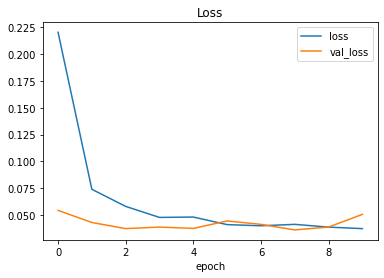

In [219]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

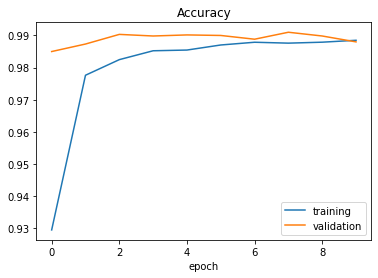

In [220]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

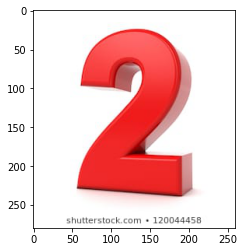

In [221]:
import requests
from PIL import Image
#testing on random image
url = 'https://image.shutterstock.com/image-illustration/3d-shiny-red-number-collection-260nw-120044458.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

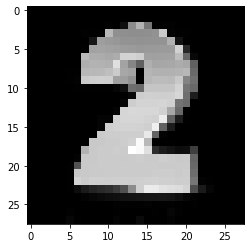

In [222]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [223]:
img = img/255
img = img.reshape(1, 28,28,1)

In [224]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [2]


In [225]:
#testing dataset
score = model.evaluate(X_test, y_test, verbose=0) #test images are passed
print(type(score))
print('Test score:', score[0]) #loss
print('Test accuracy:', score[1]*100,'%') #accuracy

<class 'list'>
Test score: 0.04111103996399124
Test accuracy: 98.86000156402588 %


In [226]:
# Just visualizing output of 2 conv layers using model class api
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output) # 1st conv layer index = 0
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output) # we want output from our second conv layer ... 3rd layer therefore index=2

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

print(visual_layer1.shape) # we see it contains 30 outputs 1 for each filter of dim 24X24 
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


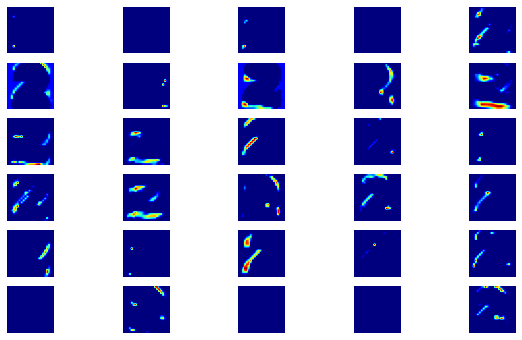

In [227]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30): # 30 FILTERS
    plt.subplot(6, 5, i+1) # 6 rows 5 columns # with each iteration we put preceding img
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

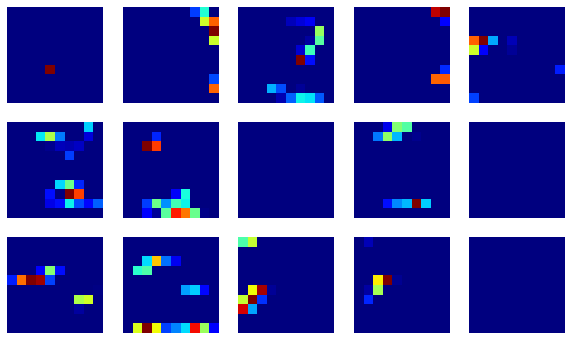

In [228]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')